## Data Understanding Python Notebook.



In [1]:
# Read data from sqllite database which has all the csv files dumped earlier.
import sqlite3
import pandas as pd
import numpy as np
conn = sqlite3.connect("C:\Users\Amandeep\pluralsight.db")

user_assessment_scores = pd.read_sql_query("select * from user_assessment_scores;", conn)
user_course_views = pd.read_sql_query("select * from user_course_views;", conn)
course_tags = pd.read_sql_query("select * from course_tags;", conn)
user_interests = pd.read_sql_query("select * from user_interests;", conn)

# Close connection of sqlite
conn.close()

In [2]:
from IPython.display import display, HTML

print("User Assessments : Dims = " + str(user_assessment_scores.shape))
display(user_assessment_scores.head(4))
display(user_assessment_scores.tail(4))

print("\nUser Course Views : Dims = " + str(user_course_views.shape))
display(user_course_views.head(4))
display(user_course_views.tail(4))

print("\nCourse Tags : Dims = " + str(course_tags.shape))
display(course_tags.head(4))
display(course_tags.tail(4))

print("\nUser Interests : Dims = " + str(user_interests.shape))
display(user_interests.head(4))
display(user_interests.tail(4))

User Assessments : Dims = (6571, 4)


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
6567,8887,angular-js,2016-09-30 22:30:48,221
6568,8887,docker,2017-03-24 17:55:06,148
6569,8887,html5,2017-02-10 16:38:53,241
6570,4440,c-sharp,2017-09-04 15:58:48,126



User Course Views : Dims = (249238, 6)


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
249234,9999,2017-10-14,python-getting-started,104,Beginner,1612
249235,10000,2017-08-18,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,402
249236,10000,2017-08-21,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,9500
249237,10000,2017-08-21,apex-fundamental-coding,229,Beginner,1659



Course Tags : Dims = (11337, 2)


,course_id,course_tags
0,12-principles-animation-toon-boom-harmony-1475,2d-animation
1,2d-racing-game-series-unity-5-1312,game-design
2,2d-racing-games-unity-volume-2-1286,game-art
3,2d-racing-games-unity-volume-2-1286,digital-painting


,course_id,course_tags
11333,z-os-mainframe-introduction,mainframe
11334,z-os-tso-ispf-environment-introduction,mainframe
11335,zsphere-modeling-zbrush-3505,3d-modeling
11336,zsphere-modeling-zbrush-3505,3d-sculpting



User Interests : Dims = (297526, 3)


,user_handle,interest_tag,date_followed
0,1,mvc-scaffolding,2017-06-27 16:26:52
1,1,mvc2,2017-06-27 16:26:52
2,1,mvc-html-helpers,2017-06-27 16:26:52
3,1,mvc4-ioc,2017-06-27 16:26:52


,user_handle,interest_tag,date_followed
297522,10000,salesforce,2017-08-14 14:56:57
297523,10000,sql,2017-08-14 14:56:57
297524,10000,java,2017-08-14 14:56:57
297525,10000,c#,2017-08-14 14:56:57


In [3]:
# Lets update the datatypes.
user_assessment_scores['user_assessment_score'] = pd.to_numeric(user_assessment_scores['user_assessment_score'])
user_assessment_scores['user_assessment_date'] = pd.to_datetime(user_assessment_scores['user_assessment_score'])

user_course_views['view_time_seconds'] = pd.to_numeric(user_course_views['view_time_seconds'])
user_course_views['view_date'] = pd.to_datetime(user_course_views['view_date'])

user_interests['date_followed'] = pd.to_datetime(user_interests['date_followed'])

In [4]:
print(user_assessment_scores.isna().sum() + user_assessment_scores.isnull().sum())
print(user_course_views.isnull().sum() + user_course_views.isna().sum())
print(course_tags.isnull().sum() + course_tags.isna().sum())
print(user_interests.isnull().sum() + user_interests.isna().sum())

user_handle              0
assessment_tag           0
user_assessment_date     0
user_assessment_score    0
dtype: int64
user_handle          0
view_date            0
course_id            0
author_handle        0
level                0
view_time_seconds    0
dtype: int64
course_id      0
course_tags    0
dtype: int64
user_handle      0
interest_tag     0
date_followed    0
dtype: int64


There is no missing data, hence we don't have to deal with any missing data cases for now.
<br><br>- Lets get rid of duplicate rows from the data. <br>- Next lets see if when we have all the data for users in interest and course view table

In [5]:
# We have some rows which are duplicate. Lets get rid of those rows, 
# so that we can train our model only once on one training set.

if(user_assessment_scores.drop_duplicates().shape[0] != user_assessment_scores.shape[0]):
    user_assessment_scores = user_assessment_scores.drop_duplicates()
    print("Duplicates in user assessment scores df removed")
    
if(user_course_views.drop_duplicates().shape[0] != user_course_views.shape[0]):
    user_course_views = user_course_views.drop_duplicates()
    print("Duplicates in user course views df removed")

if(course_tags.drop_duplicates().shape[0] != course_tags.shape[0]):
    course_tags = course_tags.drop_duplicates()
    print("Duplicates in course tags df removed")

if(user_interests.drop_duplicates().shape[0] != user_interests.shape[0]):
    user_interests = user_interests.drop_duplicates()
    print("Duplicates in user interest df removed")

Duplicates in user interest df removed


Next let us collect all user ids. We will use this all users df to find users who have missing interests, course views, or assessments!<br> Similarly, we will also find the courses with missing tags but has user course view!

In [6]:
unique_users_in_assessment = user_assessment_scores['user_handle'].drop_duplicates()
unique_users_in_course_view = user_course_views['user_handle'].drop_duplicates()
unique_users_interests = user_interests['user_handle'].drop_duplicates()

unique_users = pd.concat([unique_users_in_assessment, unique_users_interests, unique_users_in_course_view]).drop_duplicates()
print(unique_users.head())
print(unique_users.shape[0])

0    7487
6    7407
7    3600
8    8152
9    3637
Name: user_handle, dtype: object
10000


In [7]:
unique_courses_in_course_view = user_course_views['course_id'].drop_duplicates()
unique_courses_in_course_tags = course_tags['course_id'].drop_duplicates()
unique_courses = pd.concat([unique_courses_in_course_view, unique_courses_in_course_tags]).drop_duplicates()
print(unique_courses.head())
print(unique_courses.shape[0])

0           cpt-sp2010-web-designers-branding-intro
2                      cpt-sp2010-web-designers-css
4    aws-certified-solutions-architect-professional
5              aws-certified-sysops-admin-associate
6                     aws-system-admin-fundamentals
Name: course_id, dtype: object
5942


We have found that there are 10000 users and 5942 courses in the system. Lets also grab unique course tags, interest tags, and assessment tags.

In [8]:
unqiue_course_tags = course_tags['course_tags'].drop_duplicates()
print(unqiue_course_tags.head())
print(unqiue_course_tags.shape[0])

unqiue_assessment_tags = user_assessment_scores['assessment_tag'].drop_duplicates()
print(unqiue_assessment_tags.head())
print(unqiue_assessment_tags.shape[0])

unique_interest_tags = user_interests['interest_tag'].drop_duplicates()
print(unique_interest_tags.head())
print(unique_interest_tags.shape[0])

all_tags = pd.concat([unqiue_course_tags, unqiue_assessment_tags, unique_interest_tags]).drop_duplicates()
print("Total number of tags : " + str(all_tags.shape[0]))

0        2d-animation
1         game-design
2            game-art
3    digital-painting
4       image-editing
Name: course_tags, dtype: object
999
0    angular-js
1           css
2         html5
3          java
4    javascript
Name: assessment_tag, dtype: object
54
0     mvc-scaffolding
1                mvc2
2    mvc-html-helpers
3            mvc4-ioc
4         mvc-testing
Name: interest_tag, dtype: object
748
Total number of tags : 1191


Results show that we have 999 unique course tags, 54 assessment tags, and 748 interest tags! The total tags are 1191 which means we have some tags common.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor']=True
user_assessment_scores.dtypes

user_handle                      object
assessment_tag                   object
user_assessment_date     datetime64[ns]
user_assessment_score             int64
dtype: object

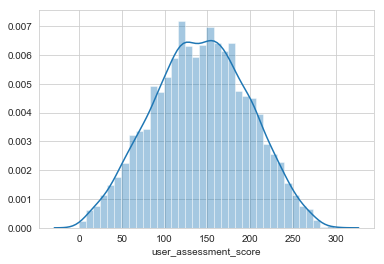

In [10]:
# Plot the assessment scores
sns.distplot(user_assessment_scores['user_assessment_score'])

#### Let's start to create some similarity measure.
We will start by creating similarity for users based on their assessments.
We will create a class that takes in the dataframe, value columns, and index column to return top users based on SVD, Cosine, and Pearson similarity.

In [11]:
TOP_CUTOFF_USERS = 10

In [150]:
# Class for similarity measure.
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityMeasure:
    def __initialize_matrix(self):
        if self.__values_column is None:
            self.__dataframe['temp_val'] = 1
            self.__values_column = 'temp_val'
        self.__scores_matrix = self.__dataframe.pivot(index = self.__index_column, columns= self.__columns_column, 
                                            values = self.__values_column)
        self.__scores_matrix = self.__scores_matrix.fillna(0)
        self.index_values = self.__scores_matrix.index.values
        # we need reindexed to calclulate the cosine similarities
        self.__reindexed_scores_matrix = self.__scores_matrix.copy()
        self.__reindexed_scores_matrix.index = range(0, self.index_values.shape[0])
        self.pearson_similarity_martix = None
        self.cosine_similarities_matrix = None
    
    def calculate_pearson_similarity(self):
        self.pearson_similarity_martix = self.__scores_matrix.T.corr(method = 'pearson')
        print("Pearson similarity calculated!")
        
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_pearson_similar_users(self, user_handle):
        if self.pearson_similarity_martix is not None:
            user_handle_scores = self.pearson_similarity_martix[user_handle]
            similar_users = user_handle_scores.sort_values(ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - Pearson similarity not calculated!!!!")
    
    # Function to calculate cosine similarity.
    def calculate_cosine_similarity(self):
        A_sparse = sparse.csr_matrix(self.__reindexed_scores_matrix)
        self.cosine_similarities_matrix = cosine_similarity(A_sparse, dense_output = False)
        print("Cosine similarity calculated!")
        
    def calculate_svd_similarity(self, dim_size = 50):
        normalised_mat = self.__reindexed_scores_matrix - np.asarray([(np.mean(self.__reindexed_scores_matrix, 1))]).T
        A = normalised_mat.T / np.sqrt(self.__reindexed_scores_matrix.shape[0] - 1)
        
        # Using covariance method!
        #cov_mat = np.cov(normalised_mat)
        #evals, evecs = np.linalg.eig(cov_mat)
        #self.__sliced = evecs[:, :dim_size]
        
        # Using svd
        U, S, V = np.linalg.svd(A)
        #Reducing the dimensions
        self.__sliced = V.T[:, :dim_size]
        self.__magnitude = np.sqrt(np.einsum('ij, ij -> i', self.__sliced, self.__sliced))
        
    def get_svd_similar_users(self, user_handle):
        index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
        user_row = self.__sliced[index, :]
        similarity = np.dot(user_row, self.__sliced.T) / (self.__magnitude[index] * self.__magnitude)
        scores = pd.DataFrame(similarity, index = self.index_values)
        similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
        return similar_users
        
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_cosine_similar_users(self, user_handle):
        if self.cosine_similarities_matrix is not None:
            idx = np.where(self.index_values == user_handle)
            print(idx)
            scores = pd.DataFrame(self.cosine_similarities_matrix[idx].T.toarray(), index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - Cosine similarity not caclculated!!!!")
        
    def __init__(self, parameters):
        self.__dataframe = parameters['dataframe'].copy()
        self.__index_column = parameters['index_column']
        # The column in dataframe which will be used to created columns in matrix
        self.__columns_column = parameters['columns_column']
        if 'values_column' in parameters:
            self.__values_column = parameters['values_column']
        else:
            self.__values_column = None
        self.__initialize_matrix()

In [147]:
similarity_measure = SimilarityMeasure({
                                'dataframe' : user_assessment_scores,
                                'index_column' : 'user_handle', 'columns_column' : 'assessment_tag',
                                'values_column' : 'user_assessment_score'
                                })

In [127]:
similarity_measure.calculate_cosine_similarity()
similarity_measure.get_cosine_similar_users('8887')

Cosine similarity calculated!
(array([2752], dtype=int64),)


,0
9460,0.841721
8412,0.789517
5236,0.788519
5694,0.766058
1494,0.763504
4048,0.729360
840,0.709927
9177,0.703223
7997,0.696422


In [128]:
similarity_measure.calculate_pearson_similarity()
similarity_measure.get_pearson_similar_users('8887')

Pearson similarity calculated!


user_handle
9460    0.834141
5236    0.776508
8412    0.775941
5694    0.752632
1494    0.750021
4048    0.713377
840     0.693611
9177    0.686328
7997    0.683086
Name: 8887, dtype: float64

In [148]:
similarity_measure.calculate_svd_similarity()
similarity_measure.get_svd_similar_users('8887')

C:\Python27\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in divide


,0
5694,0.788946
5236,0.770527
9460,0.764829
840,0.761219
9177,0.749309
7246,0.748266
7997,0.747035
1494,0.745246
8716,0.669488


In [130]:
user_interests[['user_handle', 'interest_tag']].drop_duplicates().head(4)

,user_handle,interest_tag
0,1,mvc-scaffolding
1,1,mvc2
2,1,mvc-html-helpers
3,1,mvc4-ioc


In [151]:
similarity_measure = SimilarityMeasure({
                                'dataframe' : user_interests[['user_handle', 'interest_tag']].drop_duplicates(),
                                'index_column' : 'user_handle', 'columns_column' : 'interest_tag'
                                })
similarity_measure.calculate_svd_similarity()
similarity_measure.get_svd_similar_users('8887')

,0
8595,0.757870
1090,0.717697
7809,0.698900
4335,0.683082
5790,0.657613
5432,0.651272
4616,0.639224
271,0.634313
5617,0.634189


In [152]:
similarity_measure.get_svd_similar_users('1221')

,0
7013,0.990057
9755,0.990057
6068,0.990057
1658,0.988371
1158,0.986385
2574,0.986385
4995,0.981130
5078,0.961065
8557,0.943308


In [153]:
similarity_measure.calculate_cosine_similarity()
similarity_measure.get_cosine_similar_users('1221')

Cosine similarity calculated!
(array([249], dtype=int64),)


,0
1158,0.925820
2574,0.925820
4164,0.857143
7013,0.857143
9755,0.857143
6068,0.857143
8606,0.845154
1727,0.845154
5563,0.845154
